<h1><b><center>TALLER CLASIFICACIÓN</center></h1>

|<h2><font color='white'>-------------------------</font><b>NATHALIE VELASCO GIRALDO||
|---|---|
| <left><font size="4">Ingeniera Química</font> | <center><img src="Logo_Univalle.png" width="65" height="65" /> |
| <left><font size="4">Estudiante de Maestría en Administración (MBA)</font> | <center><img src="logo_icesi.png" width="150" height="150" /> |
| <left><i><font size="4">Correo Electrónico: nathalievel@hotmail.com</font></i> | <center><i><font size="4">Celular: 3147158053</font></i> |
| <left><font size="4">Taller Clasificación: Nombre de la Asignatura - Universidad ICESI - Profesora: nnnnnnnnnn, Ph.D. |
    
    
<br>
<br>
<center><h4><i></i></h4>
<br>

## IMPORTACIÓN DE LIBRERÍAS NECESARIAS

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from scipy import stats
import operator

## CARGA DEL DATASET

In [268]:
Data = pd.read_excel("DATOS TELCO.xlsx") 

## VISUALIZACIÓN DATASET ORIGINAL

In [269]:
#print(Data.columns)
print(Data.shape)
Data.head()

(20000, 12)


,PROFESIONAL,SALARIO,SOBREPASO,SOBRANTE,CASA,DISPOSITIVO,LLAMADAS_LARGAS,DURACION,SATISFACCION,NIVEL_DE_USO,CONSIDERA_CAMBIO_DE_PLAN,DESERCION
0,No,2663000,0,6,313400000,226000,0,4,Bajo,Bajo,No,No
1,Si,3012000,0,13,800600000,481000,0,6,Bajo,Bajo,Si,No
2,Si,2273000,230,0,305000000,349000,16,15,Bajo,MuyBajo,DePronto,No
3,Si,2435000,208,85,224800000,472000,21,1,MuyBajo,Bajo,DeNingunaManera,No
4,No,11144000,64,48,633000000,1659000,3,2,Bajo,Alto,No,No


In [270]:
#Data.describe()

In [271]:
print("Data shape before: ",Data.shape)
#Eliminamos los datos faltantes (Missing Values)
Data.dropna(inplace = True)
#Data.drop(Data[Data["Thalium_stress_test_result"]=="NA"].index, inplace=True)
print("Data shape after: ",Data.shape)

Data shape before:  (20000, 12)
Data shape after:  (20000, 12)


## VISUALIZACIÓN DEL DATASET

In [272]:
display(Data.head())
print("Data shape: ",Data.shape)

,PROFESIONAL,SALARIO,SOBREPASO,SOBRANTE,CASA,DISPOSITIVO,LLAMADAS_LARGAS,DURACION,SATISFACCION,NIVEL_DE_USO,CONSIDERA_CAMBIO_DE_PLAN,DESERCION
0,No,2663000,0,6,313400000,226000,0,4,Bajo,Bajo,No,No
1,Si,3012000,0,13,800600000,481000,0,6,Bajo,Bajo,Si,No
2,Si,2273000,230,0,305000000,349000,16,15,Bajo,MuyBajo,DePronto,No
3,Si,2435000,208,85,224800000,472000,21,1,MuyBajo,Bajo,DeNingunaManera,No
4,No,11144000,64,48,633000000,1659000,3,2,Bajo,Alto,No,No


Data shape:  (20000, 12)


## ENTENDIENDO LOS DATOS

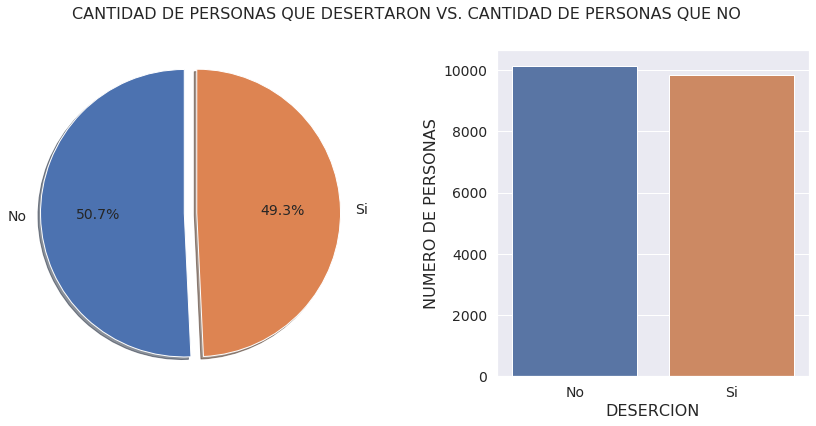

In [273]:
fig = plt.figure()
fig.suptitle("CANTIDAD DE PERSONAS QUE DESERTARON VS. CANTIDAD DE PERSONAS QUE NO", fontsize=16)

ax = fig.add_subplot(1,2,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
Data['DESERCION'].value_counts().plot(kind='pie', 
                                   figsize=(14, 6),
                                   autopct='%1.1f%%', # add in percentages
                                   startangle=90,     # start angle 90°
                                   shadow=True,       # add shadow  
                                   explode=[0, 0.1],
                                   fontsize=14, radius=1.15)
ax.set_ylabel('')


ax = fig.add_subplot(1,2,2)
ax = sns.countplot(x="DESERCION", data=Data, palette=["C0", "C1"], order = Data['DESERCION'].value_counts().index)
ax.set_xlabel("DESERCION",fontsize=16)
ax.set_ylabel("NUMERO DE PERSONAS",fontsize=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
# plt.grid(False)
plt.show()


#number_of_no_disease = sum(targ == 'No disease' for targ in Data.DESERCION)
#print("Número de pacientes SIN ENFERMEDAD",number_of_no_disease)
#number_of_disease = sum(targ == 'Disease' for targ in Data.DESERCION)
#print("Número de pacientes CON ENFERMEDAD",number_of_disease)

#### -------------------------------------------------¡DATASET PRÁCTICAMENTE BALANCEADO!-------------------------------------------------

## TIPOS DE ATRIBUTOS/VARIABLES

<center><img src="TiposVariables2.jpg" width="800" height="800" /> </center>


## CLASIFICACIÓN DE LAS VARIABLES DEL DATASET ACTUAL

- **PROFESIONAL**: *Indica si el cliente es profesional (“Si”) o no (“No”)*

- **SALARIO**: *Salario mensual estimado del cliente en COP*

- **SOBREPASO**: *Número de minutos de sobrepaso del plan actual promedio en un mes*

- **SOBRANTE**: *Porcentaje de minutos sobrantes del plan actual promedio en un mes* 

- **CASA**: *Valor estimado de la casa donde vive el cliente (así sea arrendatario) en COP, dada su dirección*

- **DISPOSITIVO**: *Valor estimado del teléfono del cliente en COP* 

- **LLAMADAS_LARGAS**: *Promedio de número de llamadas largas (de más de 15 minutos) en un mes*

- **DURACION**: *Promedio de duración de llamadas*

- **SATISFACCION**: *Nivel de satisfacción reportado por el cliente (MuyBajo, Bajo, Medio, Alto, MuyAlto)* 

- **NIVEL_DE_USO**: *Nivel de uso del servicio reportado por el cliente (MuyBajo, Bajo, Medio, Alto, MuyAlto)* 

- **CONSIDERA_CAMBIO_DE_PLAN**: *Indica si el usuario está considerando cambiar de plan o no*


- **DESERCION** (TARGET): *Indica si el usuario en cuestión desertó (“Si”) o no (“No”). La base de datos cuenta con 20000 usuarios que eran clientes de la compañía hace 6 meses, y que en ese entonces tenían una antigüedad de al menos 9 meses.*

## AGRUPAMIENTO DE LOS ATRIBUTOS DEPENDIENDO DE SU TIPO

In [274]:
nominalColumns = ["PROFESIONAL"]

ordinalColumns = ["SATISFACCION", "NIVEL_DE_USO", "CONSIDERA_CAMBIO_DE_PLAN"]

numericColumns = ["SALARIO", "SOBREPASO", "SOBRANTE", "CASA", "DISPOSITIVO", "LLAMADAS_LARGAS", "DURACION"]

## CONVERSIÓN DE LAS VARIABLES A LOS TIPOS ADECUADOS

In [275]:
from pandas.api.types import CategoricalDtype

# Convert numeric attributes
for col in numericColumns:
    Data[col] = pd.to_numeric(Data[col], errors='coerce')
    
# loop to change each column to nominal type
for col in nominalColumns:
    cat_type = CategoricalDtype(categories = None, ordered = False)
    Data[col] = Data[col].astype(dtype = cat_type)

# Convert to levels / Ordinals
ordColumnsValues = {ordinalColumns[0]:['MuyBajo', 'Bajo', 'Medio', 'Alto', 'MuyAlto'], ordinalColumns[1]:['MuyBajo', 'Bajo', 'Medio', 'Alto', 'MuyAlto'], 
                    ordinalColumns[2]:['DeNingunaManera', 'No', 'DePronto', 'Si', 'Definitivamente']}

for col in ordinalColumns:
    cat_type = CategoricalDtype(categories = ordColumnsValues[col], ordered = True)
    Data[col] = Data[col].astype(dtype = cat_type)

    
    
# Delete unnecessary columns from the dataframe:
# There aren't in this dataset

## VISUALIZACIÓN VARIABLES CATEGÓRICAS NOMINALES

####  Gráfico de barras de frecuencias para variables nominales:
##### - Permite visualizar las frecuencias relativas o absolutas para cada valor de la variable nominal. 
##### - No confundir con un histograma. 
##### - Es más fácil de interpretar si se grafica ordenando del más frecuente al menos frecuente.


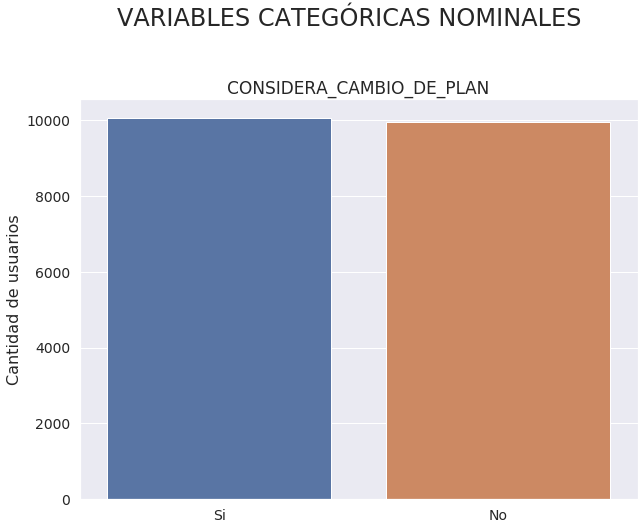

In [276]:
sns.set()

#Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle("VARIABLES CATEGÓRICAS NOMINALES", fontsize=24)
fig.subplots_adjust(top=0.82, hspace = 0.9)

plt.subplot(1,1,1).set_title(ordinalVariable, fontsize=17)
ax = sns.countplot(nominalVariable, data=Data, order = Data[nominalVariable].value_counts().index)
ax.set_xlabel("")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de usuarios", fontsize=16)
plt.xticks(size = 14, rotation=0)
plt.yticks(size = 14)
    
plt.show()

## VISUALIZACIÓN VARIABLES CATEGÓRICAS ORDINALES

### Gráfico de barras de frecuencias para variables ordinales:
##### - Permite visualizar las frecuencias relativas o absolutas para cada valor de la variable ordinal. 
##### - Es más fácil de interpretar si se grafica respetando el orden de la variable ordinal.

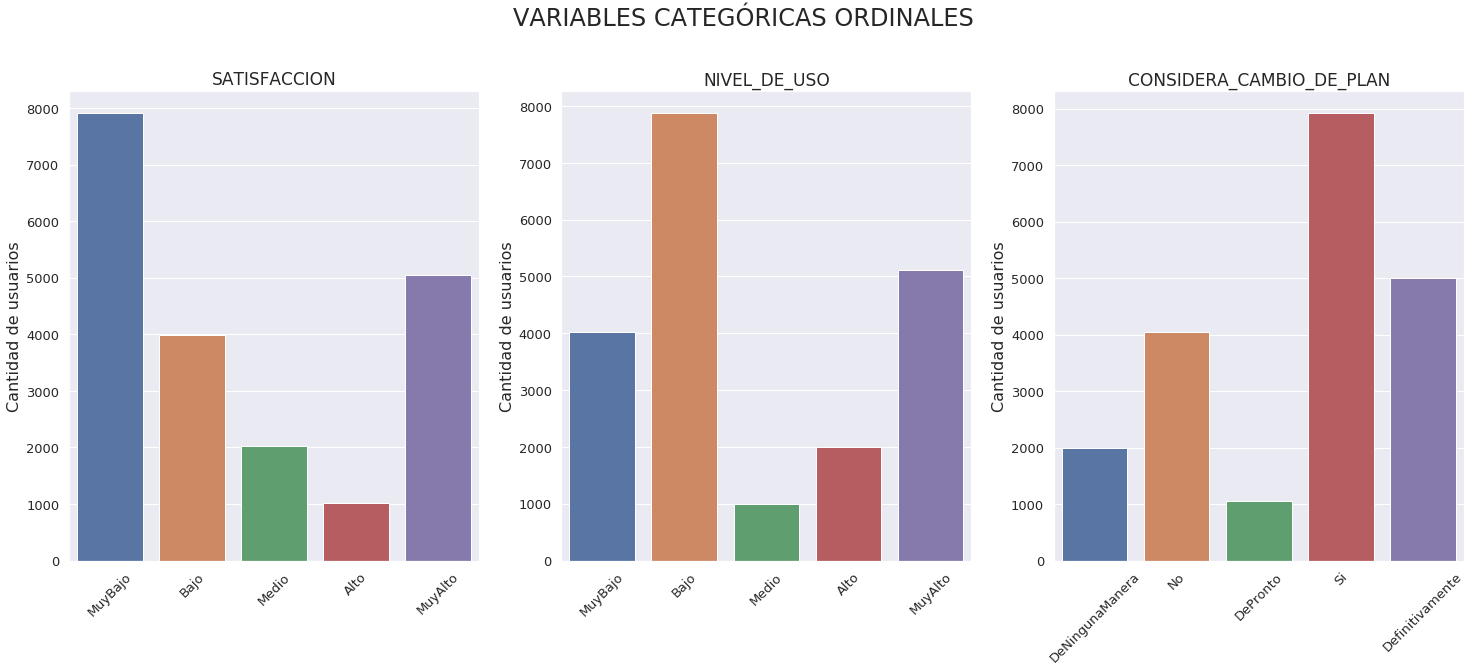

In [277]:
#Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(25,9))
fig.suptitle("VARIABLES CATEGÓRICAS ORDINALES", fontsize=24)
fig.subplots_adjust(top=0.85, hspace = 0.9)

i=1
for ordinalVariable in ordinalColumns: 
    plt.subplot(1,3,i).set_title(ordinalVariable, fontsize=17)
    ax = sns.countplot(ordinalVariable, data=Data) 
    #ax.set_xlabel("")
    ax.set_xlabel("")
    ax.set_ylabel("Cantidad de usuarios", fontsize=16)
    plt.xticks(size = 13, rotation=45)
    plt.yticks(size = 13)
    i += 1
    
plt.show()

## VISUALIZACIÓN VARIABLES NUMÉRICAS

### Histogramas:
##### - Utilizado para mostrar la distribución de las variables.
##### - No confundir con un diagrama de barras. El diagrama de barras es utilizado para comparar.
##### - Es importante elegir un buen número de cajas
##### - Nos da pistas sobre la distribución de los datos

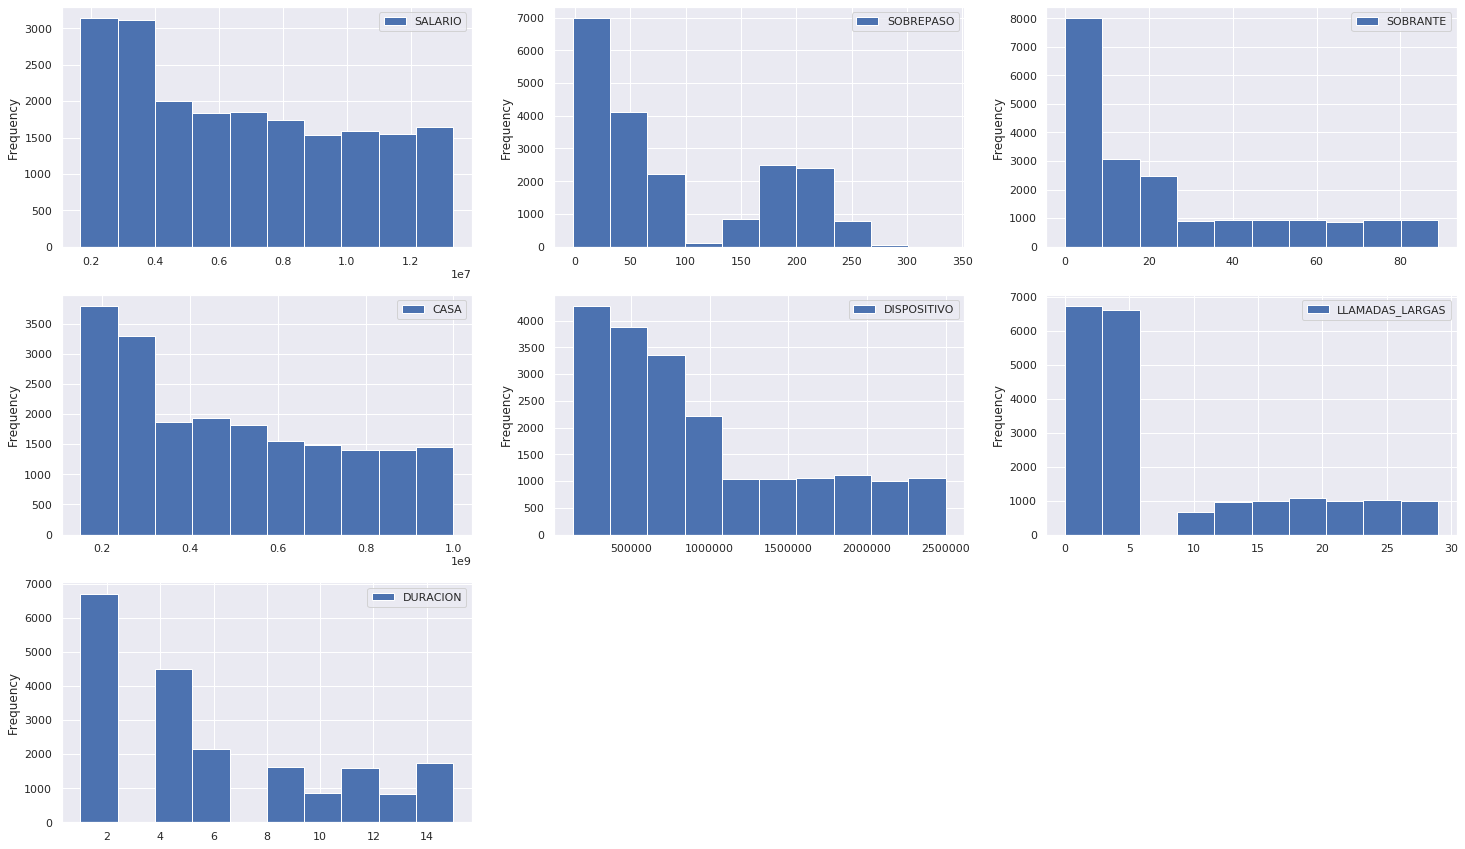

In [278]:
fig = plt.figure(figsize=(25, 15))

x = 1
# Declarando las graficas de tipo Histograma Variables Númericas
for numericVariable in numericColumns:
    ax = fig.add_subplot(3,3,x)
    Data[[numericVariable]].plot(kind='hist', ax=ax, rwidth=1)
    x = x + 1
    
plt.show()

## VARIABLES NOMINALES A "DUMMIES"

In [279]:
for nominalVariable in nominalColumns:
    dummies = pd.get_dummies(Data[nominalVariable], prefix = nominalVariable)
    Data = pd.concat([Data.drop(nominalVariable, axis = 1), dummies], axis = 1)
Data.head()

,SALARIO,SOBREPASO,SOBRANTE,CASA,DISPOSITIVO,LLAMADAS_LARGAS,DURACION,SATISFACCION,NIVEL_DE_USO,CONSIDERA_CAMBIO_DE_PLAN,DESERCION,PROFESIONAL_No,PROFESIONAL_Si
0,2663000,0,6,313400000,226000,0,4,Bajo,Bajo,No,No,1,0
1,3012000,0,13,800600000,481000,0,6,Bajo,Bajo,Si,No,0,1
2,2273000,230,0,305000000,349000,16,15,Bajo,MuyBajo,DePronto,No,0,1
3,2435000,208,85,224800000,472000,21,1,MuyBajo,Bajo,DeNingunaManera,No,0,1
4,11144000,64,48,633000000,1659000,3,2,Bajo,Alto,No,No,1,0


## VARIABLES ORDINALES A NUMÉRICAS
#### El clasificador que se implementará es el árbol de decisión, este no es un método basado en distancias, por lo cual, el valor numérico para las variables ordinales es adecuado.

In [280]:
#ordColumnsValues = [['<=120 mg/dl', '>120 mg/dl'], ['downsloping', 'flat', 'upsloping']]
for ordinalVariable in ordinalColumns: 
    Data[ordinalVariable] = Data[ordinalVariable].cat.codes

Data.head()

,SALARIO,SOBREPASO,SOBRANTE,CASA,DISPOSITIVO,LLAMADAS_LARGAS,DURACION,SATISFACCION,NIVEL_DE_USO,CONSIDERA_CAMBIO_DE_PLAN,DESERCION,PROFESIONAL_No,PROFESIONAL_Si
0,2663000,0,6,313400000,226000,0,4,1,1,1,No,1,0
1,3012000,0,13,800600000,481000,0,6,1,1,3,No,0,1
2,2273000,230,0,305000000,349000,16,15,1,0,2,No,0,1
3,2435000,208,85,224800000,472000,21,1,0,1,0,No,0,1
4,11144000,64,48,633000000,1659000,3,2,1,3,1,No,1,0


## ORGANIZACIÓN Y BALANCEO DE DATOS
#### Los clases están casi balanceadas, por lo que para este caso se utiliza "subsampling" para balancear las clases del dataset. (No es la única forma de hacerlo, ej: utilizar los datos eliminados para test, oversampling, etc).

In [281]:
#Sort data by label value:
# Data = Data.sort_values(by='Target')

#Split by class:
Class_0 = Data[Data.DESERCION=='No']
#Class_0 = Class_0.drop('Target',axis=1)
print("Class_0 shape: ", Class_0.shape)

Class_1 = Data[Data.DESERCION=='Si']
print("Class_1 shape: ", Class_1.shape)

#Subsampling:
Class_0 = Class_0.sample(n=9852, axis=0, random_state=1)
#Class_1 = Class_1.drop('Target',axis=1)
print("Class_0 shape: ", Class_0.shape)

Data2 = pd.concat([Class_0, Class_1]) 
print("Data2 shape:    ",Data2.shape)

#Split features and labels:
Label = Data2.DESERCION
Features = Data2.drop('DESERCION',axis=1)

feature_columns = Features.columns

display(Class_0.head())
display(Class_1.head())
display(Data2.head())
display(Features.head())
display(Label.head())

Class_0 shape:  (10148, 13)
Class_1 shape:  (9852, 13)
Class_0 shape:  (9852, 13)
Data2 shape:     (19704, 13)


,SALARIO,SOBREPASO,SOBRANTE,CASA,DISPOSITIVO,LLAMADAS_LARGAS,DURACION,SATISFACCION,NIVEL_DE_USO,CONSIDERA_CAMBIO_DE_PLAN,DESERCION,PROFESIONAL_No,PROFESIONAL_Si
4820,3020000,0,0,529500000,259000,1,15,4,4,1,No,1,0
6037,6122000,51,0,700800000,349000,5,8,2,1,2,No,1,0
3388,6161000,0,0,856200000,762000,0,15,0,1,3,No,0,1
1475,4615000,45,79,609600000,774000,4,10,4,4,3,No,0,1
5048,3957000,71,12,192400000,491000,5,6,0,0,3,No,1,0


,SALARIO,SOBREPASO,SOBRANTE,CASA,DISPOSITIVO,LLAMADAS_LARGAS,DURACION,SATISFACCION,NIVEL_DE_USO,CONSIDERA_CAMBIO_DE_PLAN,DESERCION,PROFESIONAL_No,PROFESIONAL_Si
10148,10006000,38,33,788200000,2133000,3,2,1,4,3,Si,1,0
10149,8819000,174,18,153600000,1847000,25,4,4,1,0,Si,1,0
10150,4449000,74,69,600000000,614000,5,2,0,4,1,Si,1,0
10151,10816000,0,0,281800000,1837000,0,13,0,0,1,Si,1,0
10152,8033000,251,14,221500000,873000,26,4,4,0,4,Si,0,1


,SALARIO,SOBREPASO,SOBRANTE,CASA,DISPOSITIVO,LLAMADAS_LARGAS,DURACION,SATISFACCION,NIVEL_DE_USO,CONSIDERA_CAMBIO_DE_PLAN,DESERCION,PROFESIONAL_No,PROFESIONAL_Si
4820,3020000,0,0,529500000,259000,1,15,4,4,1,No,1,0
6037,6122000,51,0,700800000,349000,5,8,2,1,2,No,1,0
3388,6161000,0,0,856200000,762000,0,15,0,1,3,No,0,1
1475,4615000,45,79,609600000,774000,4,10,4,4,3,No,0,1
5048,3957000,71,12,192400000,491000,5,6,0,0,3,No,1,0


,SALARIO,SOBREPASO,SOBRANTE,CASA,DISPOSITIVO,LLAMADAS_LARGAS,DURACION,SATISFACCION,NIVEL_DE_USO,CONSIDERA_CAMBIO_DE_PLAN,PROFESIONAL_No,PROFESIONAL_Si
4820,3020000,0,0,529500000,259000,1,15,4,4,1,1,0
6037,6122000,51,0,700800000,349000,5,8,2,1,2,1,0
3388,6161000,0,0,856200000,762000,0,15,0,1,3,0,1
1475,4615000,45,79,609600000,774000,4,10,4,4,3,0,1
5048,3957000,71,12,192400000,491000,5,6,0,0,3,1,0


4820    No
6037    No
3388    No
1475    No
5048    No
Name: DESERCION, dtype: object

## HISTOGRAMA POR CARACTERÍSTICA EN LAS 2 CLASES

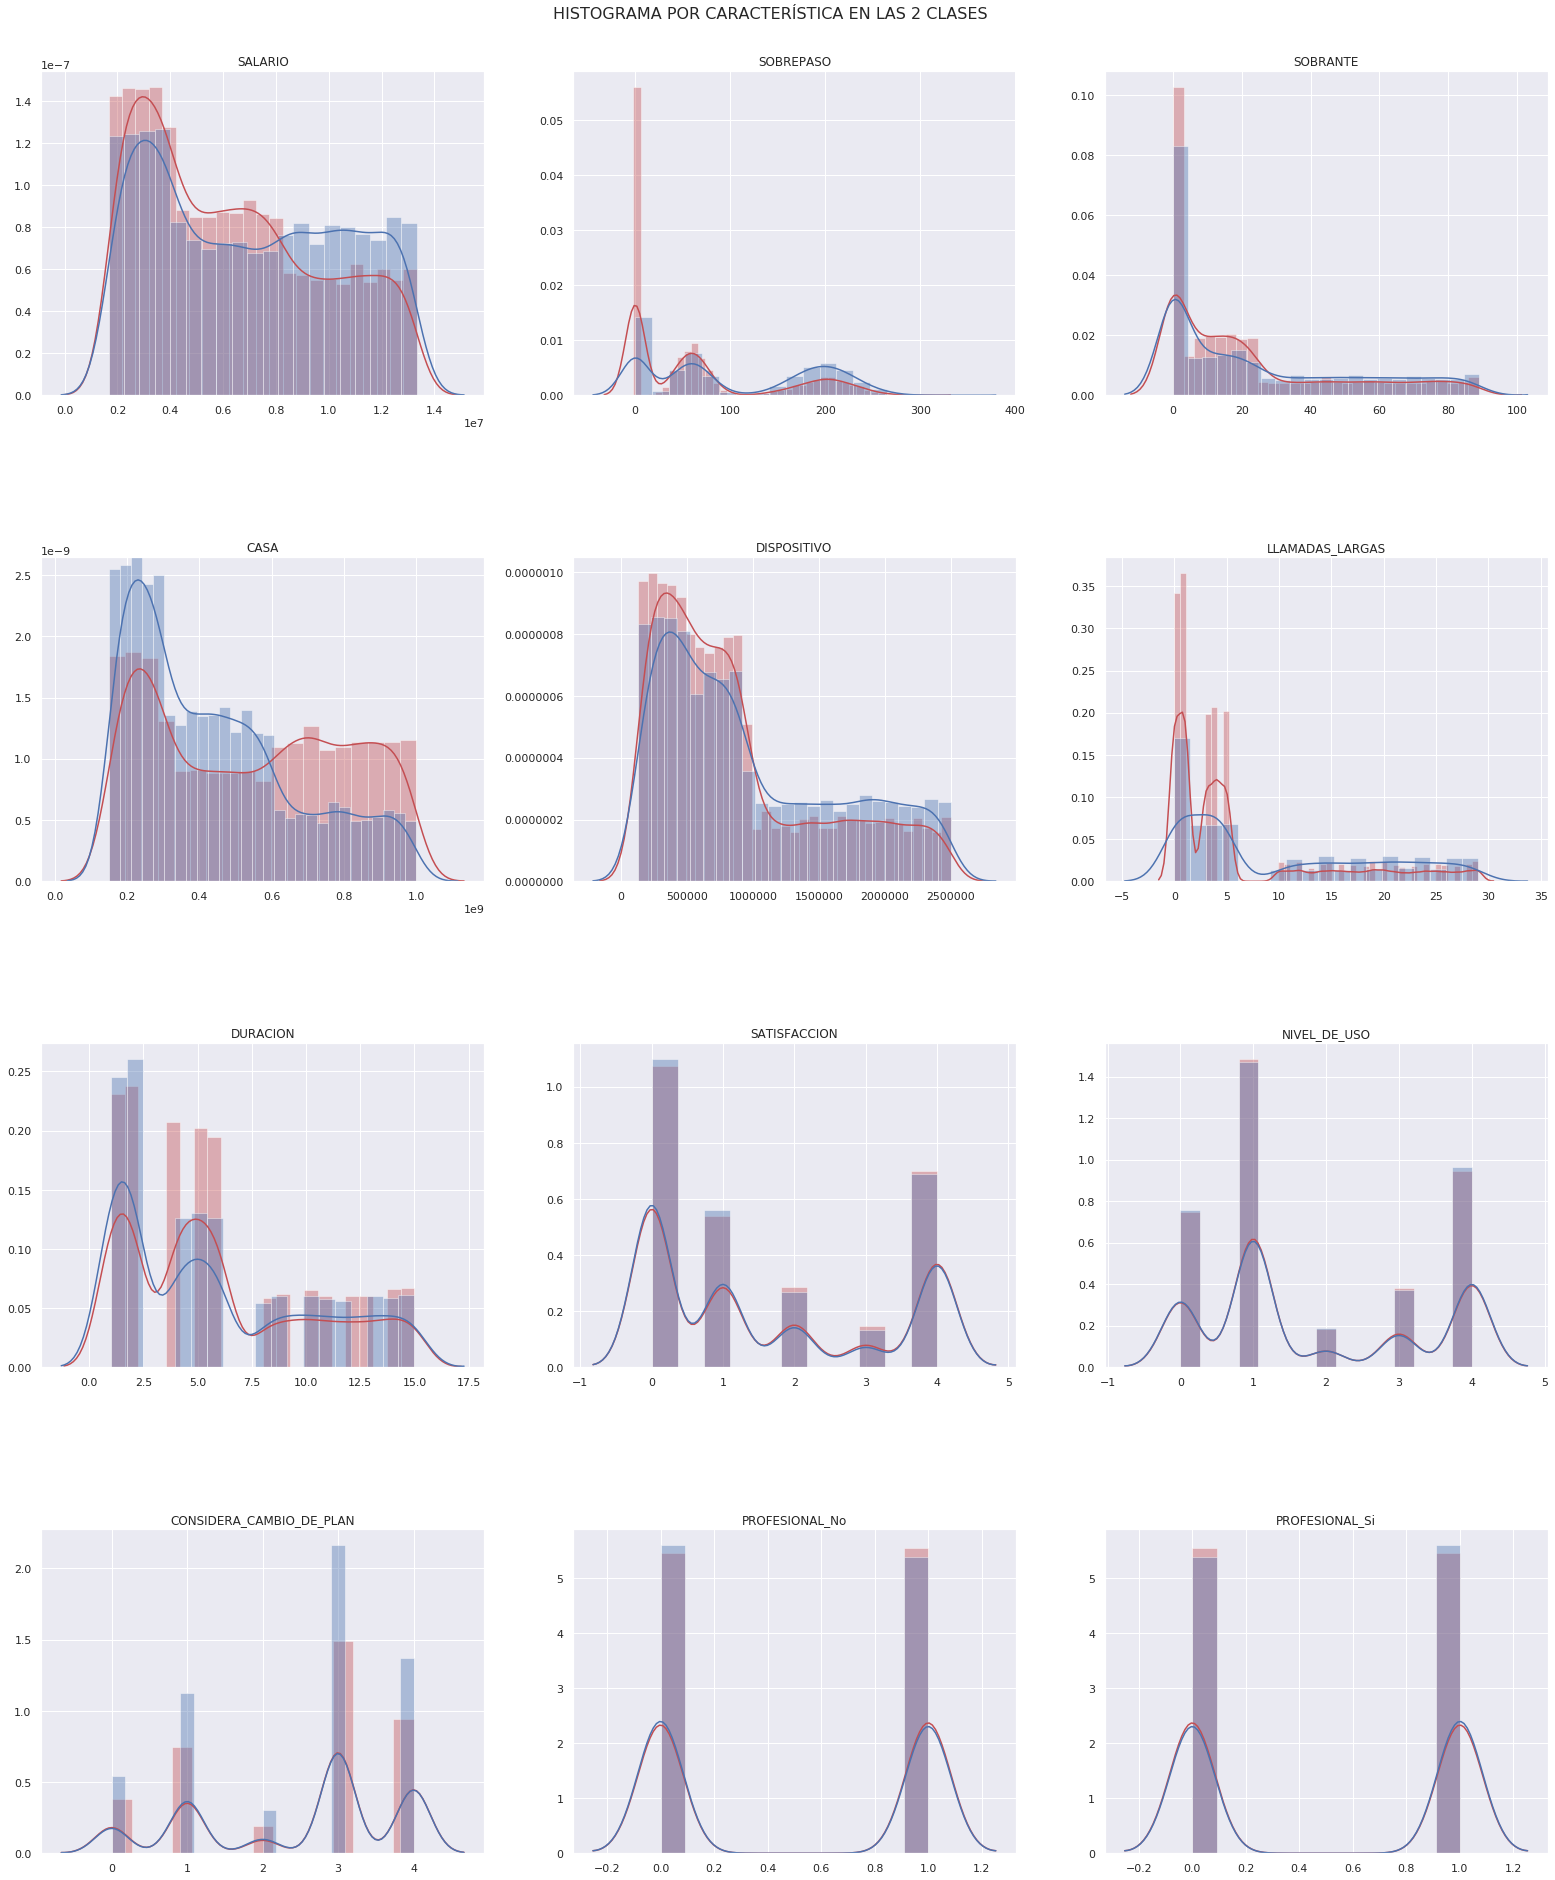

In [282]:
#Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(27,30))
fig.suptitle("HISTOGRAMA POR CARACTERÍSTICA EN LAS 2 CLASES", fontsize=16)
fig.subplots_adjust(top=0.95, hspace = 0.5)

x=1
for feature in feature_columns: 
    plt.subplot(4,3,x).set_title(feature)
    sns.distplot(Class_0[[feature]], color = 'r') #No
    sns.distplot(Class_1[[feature]], color = 'b') #Si
    x = x+1
    
plt.show()

## PARTICIÓN DE DATOS: ENTRENAMIENTO - TEST

In [283]:
from sklearn.model_selection import train_test_split
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(Features, Label, test_size = 0.25)

## CLASIFICACIÓN CON ÁRBOL DE DECISIÓN

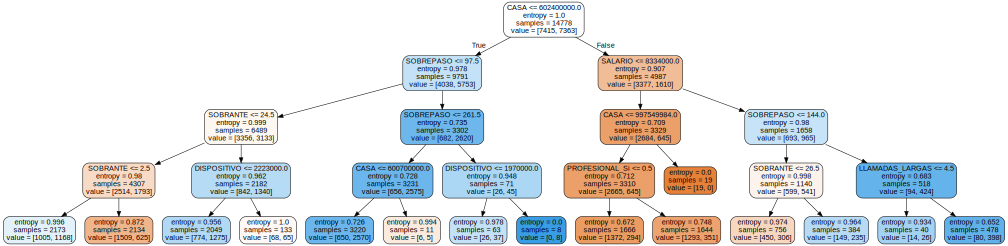

In [284]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 4, splitter='best').fit(x_train, y_train) #max_features='sqrt', 

y_out = clf.predict(x_test) #Predict class or regression value for X.

#import graphviz
from graphviz import Source
import pydotplus

dot_data = export_graphviz(clf,
                            feature_names=feature_columns,
                            out_file=None,
                            filled=True,
                            rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"14,18!"')

gvz_graph = Source(pydot_graph.to_string())

display(gvz_graph)

## EVALUACIÓN DEL DESEMPEÑO

Confusion Matrix:
 [[1548  889]
 [ 576 1913]]
Accuracy Score:  0.7025984571660576
Max Depth of the Tree:  4


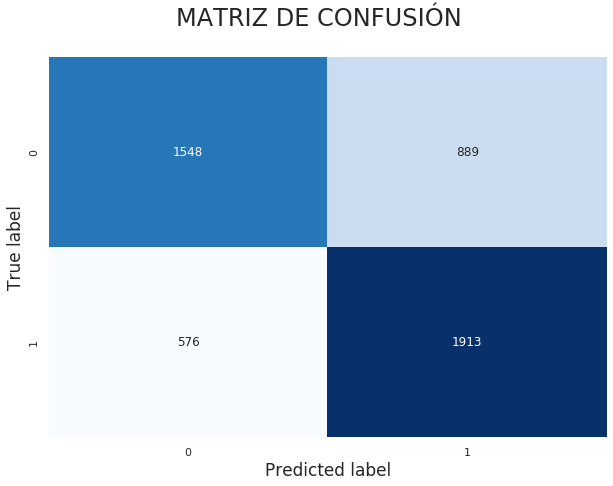

In [285]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_out) #(y_true, y_pred)
figsize = (10,7)
fig = plt.figure(figsize=figsize)
fig.suptitle("MATRIZ DE CONFUSIÓN", fontsize=24)
heatmap=sns.heatmap(cm, xticklabels=1, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.ylabel('True label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='center', va='center', fontsize=16)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', va='center', fontsize=16)

print("Confusion Matrix:\n",cm)

Score = clf.score(x_test, y_test)
print("Accuracy Score: ",Score)
#Other option: print("Accuracy: ",metrics.accuracy_score(y_test, y_out))

print("Max Depth of the Tree: ",clf.max_depth)

## IMPORTANCIA DE LAS CARACTERÍSTICAS EN LA CLASIFICACIÓN CON ÁRBOL DE DECISIÓN

Number of Features:  12


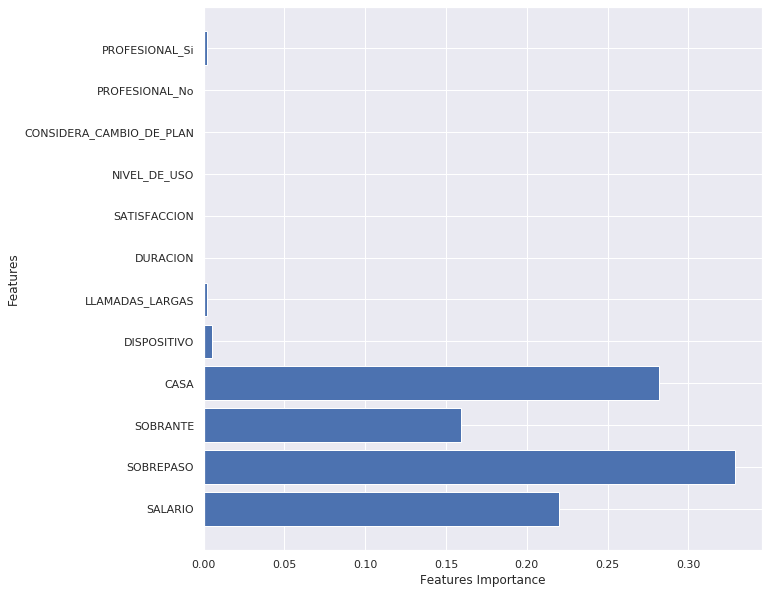

In [286]:
plt.figure(figsize=(10, 10))
caract=Features.shape[1]
print('Number of Features: ',caract)
plt.barh(range(caract),clf.feature_importances_)
plt.yticks(np.arange(caract), (feature_columns))
plt.xlabel('Features Importance')
plt.ylabel('Features')

plt.show()

## CLASIFICACIÓN CON NAIVE - BAYES

Confusion Matrix:
 [[1293 1144]
 [ 864 1625]]
Accuracy Score:  0.5923670320747056


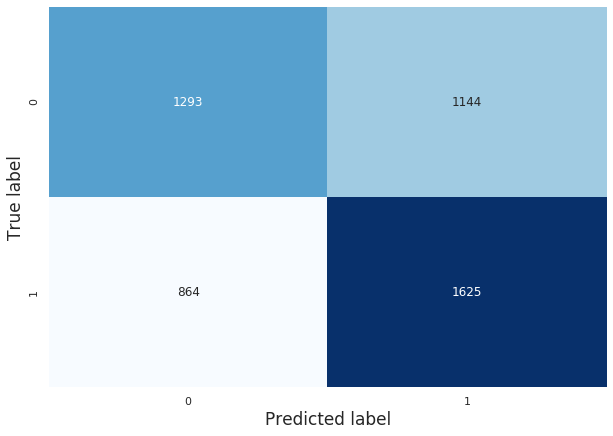

In [287]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model = gnb.fit(x_train, y_train)
#Print the score on the train data

y_out = gnb.predict(x_test) #Predict class or regression value for X.


cm = confusion_matrix(y_test, y_out) #(y_true, y_pred)
figsize = (10,7)
fig = plt.figure(figsize=figsize)
heatmap=sns.heatmap(cm, xticklabels=1, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.ylabel('True label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='center', va='center', fontsize=16)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', va='center', fontsize=16)

print("Confusion Matrix:\n",cm)

Score = gnb.score(x_test, y_test)
print("Accuracy Score: ",Score)
#Other option: print("Accuracy: ",metrics.accuracy_score(y_test, y_out))